In [1]:
import time
import random
import numpy as np

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

import gym

import matplotlib.pyplot as plt
%matplotlib inline

2022-08-07 14:31:11.843298: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load GYM environment

In [2]:
env = gym.make('Pong-v0')

STATE_SHAPE = env.observation_space.shape
NUM_ACTIONS = env.action_space.n

print('Actions: {}'.format(NUM_ACTIONS))
print('States shape: {}'.format(STATE_SHAPE))

Actions: 6
States shape: (210, 160, 3)


## Example of a state

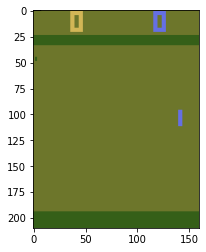

In [ ]:
s = env.reset()
_=plt.imshow(s)

## DQN

In [ ]:
# Train a DQN model here

## Virtual display and video recording for Colab

In [3]:
RECORD_VIDEO = False # True

if RECORD_VIDEO:
  
    !pip install pyvirtualdisplay > /dev/null 2>&1
    !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1400, 900))
    display.start()

## Run simulation

In [5]:
if RECORD_VIDEO:
    from gym.wrappers import Monitor
    env_sim = Monitor(env, './video', force=True)
else:
    env_sim = env

s = env_sim.reset()
totalReward = 0

for _ in range(1000):
    env_sim.render()
    a = env_sim.action_space.sample() # Change to your policy (DQN) 
    s, r, done, _ = env_sim.step(a)
    totalReward += r
    if done:        
        break
    
    if not RECORD_VIDEO:
        time.sleep(1./30)
        
env_sim.close()

print('Total reward = {}'.format(totalReward))

Total reward = -12.0


## Show the video

In [ ]:
def show_video():
    import glob
    import io
    import base64
    from IPython.display import HTML
    from IPython import display as ipythondisplay

    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
            loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
show_video()